# Model Training
## Guide
Models used:
- Logistic Regression
- Naive Bayes
- Support Vector Machine (SVM/SVC)
- K-Nearest Neigbor (KNN)
- Decision Tree

In [1]:
guide_used = "https://www.kaggle.com/code/gauravahujaravenclaw/iris-dataset-analysis-and-machine-learning"

## Make necessary imports

In [3]:
# import libraries
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# import model metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Importing data

### Import data

In [4]:
od.download("https://www.kaggle.com/datasets/arshid/iris-flower-dataset")   # Got error, so I downloaded it manually

Skipping, found downloaded files in ".\iris-flower-dataset" (use force=True to force download)


### Read data

In [5]:
file = 'iris-flower-dataset/IRIS.csv'
iris = pd.read_csv(file)
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.shape

(150, 5)

In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [10]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


## Visualization

Box and whisker plots:

<Axes: >

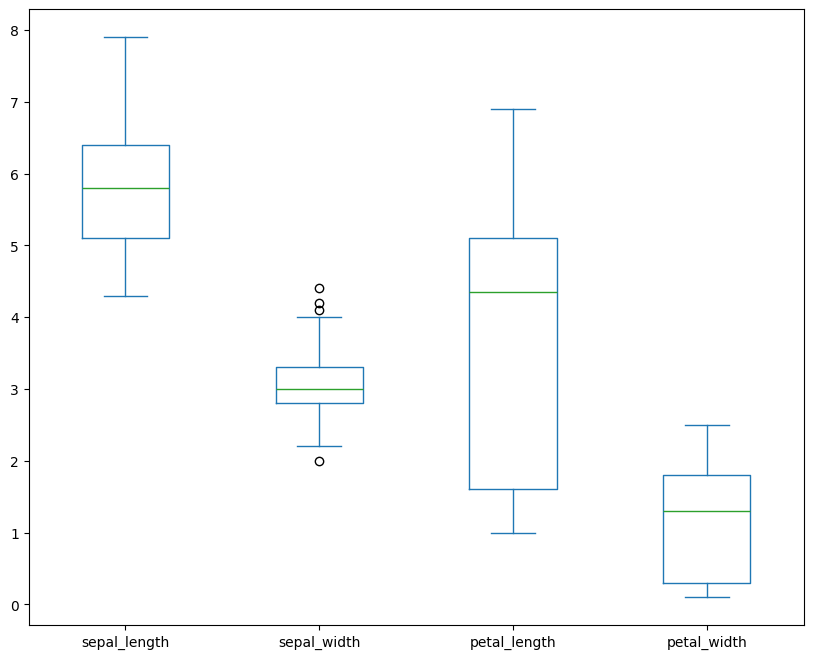

In [12]:
iris.plot(kind='box' , sharex = False , sharey = False, figsize=(10,8))

Histogram:

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

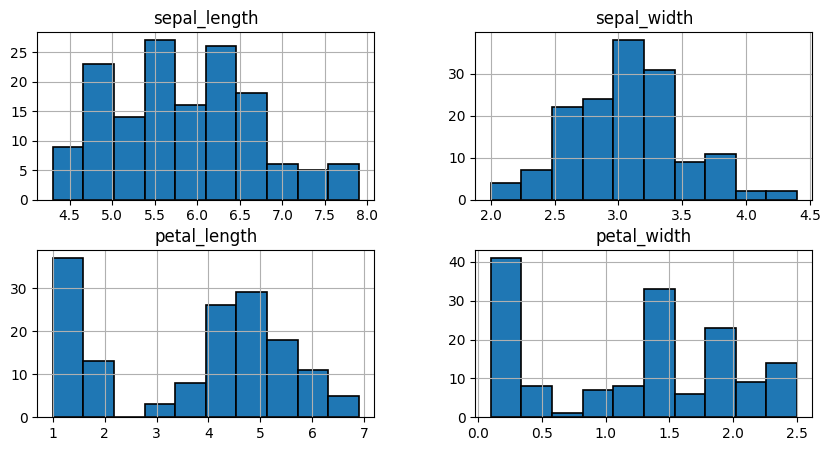

In [14]:
iris.hist(edgecolor = 'black', linewidth=1.2, figsize=(10,5))

Boxplot on each feature split out by species:

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

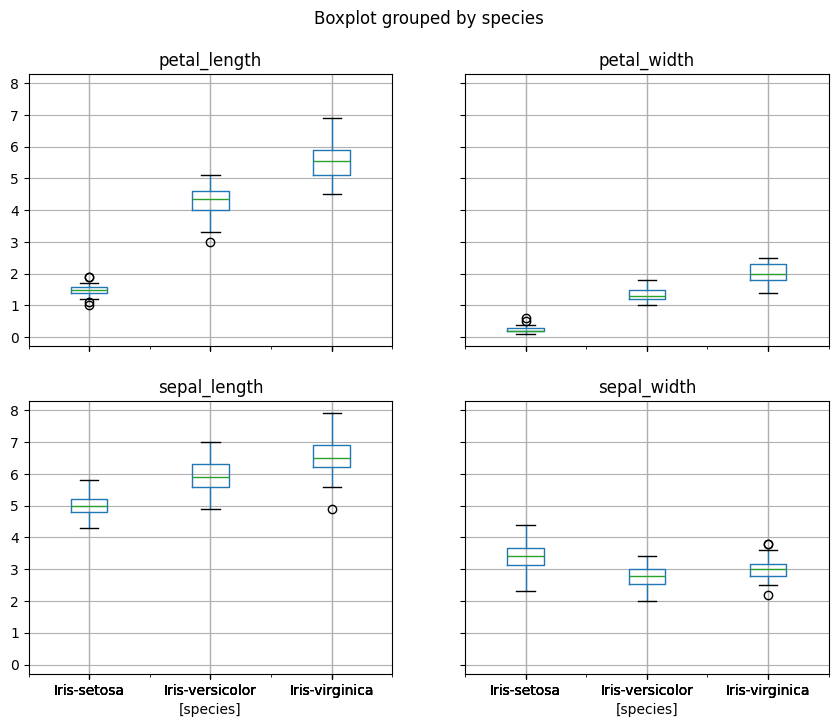

In [15]:
iris.boxplot(by="species",figsize=(10,8))

Scatter plot matrix:

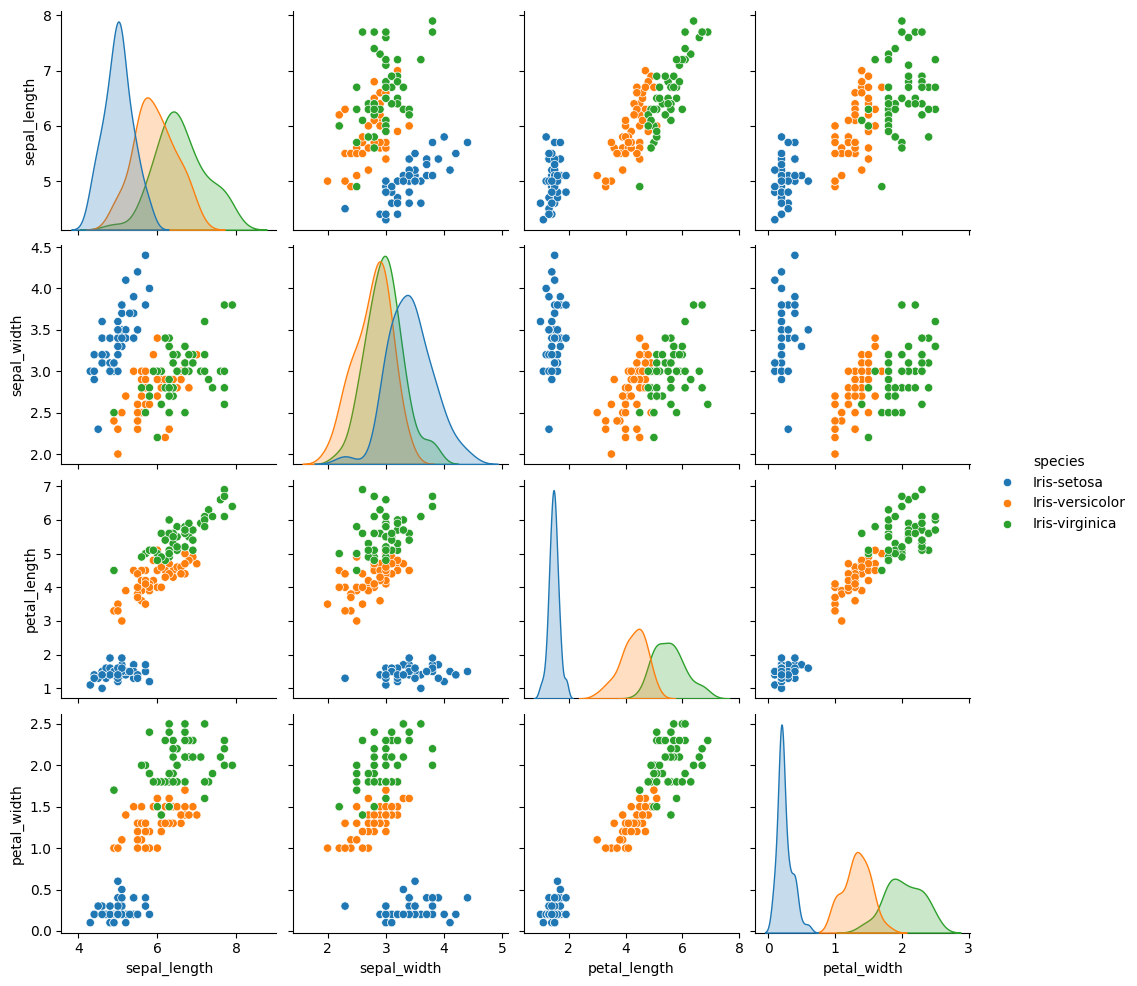

In [16]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.pairplot(iris, hue="species")

## Preprocessing

In [17]:
# Seperating the data into dependent and independent variables
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

In [18]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Applying different Classification Models

### Logistic Regression

In [21]:
classifier = LogisticRegression(max_iter=1000)  # added max_iter to remove warning
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [42]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [43]:
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 1.0


### Naive Bayes

In [24]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [41]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [44]:
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 1.0


### Support Vector Machine

In [27]:
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [40]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [45]:
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 1.0


### K-Nearest Neighbours (KNN)

In [30]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [38]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [46]:
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 1.0


### Decision Tree

In [33]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [37]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [36]:
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 1.0
